### Credits: Data obtained from https://github.com/fivethirtyeight/data/tree/master/births

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dtypes = {'year': 'str', 'month': 'str'}
src = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv'
df = pd.read_csv(src, dtype=dtypes)
df['date'] = df['year'] + "-" + df['month'] + "-" + "1"
df['date'] = pd.to_datetime(df['date'])

In [3]:
df_series = df.groupby(['date']).agg({'births': 'sum'})
df_series.head(5)

,births
date,
2000-01-01,337739
2000-02-01,324046
2000-03-01,347824
2000-04-01,323357
2000-05-01,347950


In [4]:
monthly_view = df_series.copy()
monthly_view['year'] = monthly_view.index.year
monthly_view['month'] = monthly_view.index.map(lambda x: x.strftime('%B'))
births = monthly_view.pivot("month", "year", "births")
months_list = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
monthly_births = births.reindex(months_list)

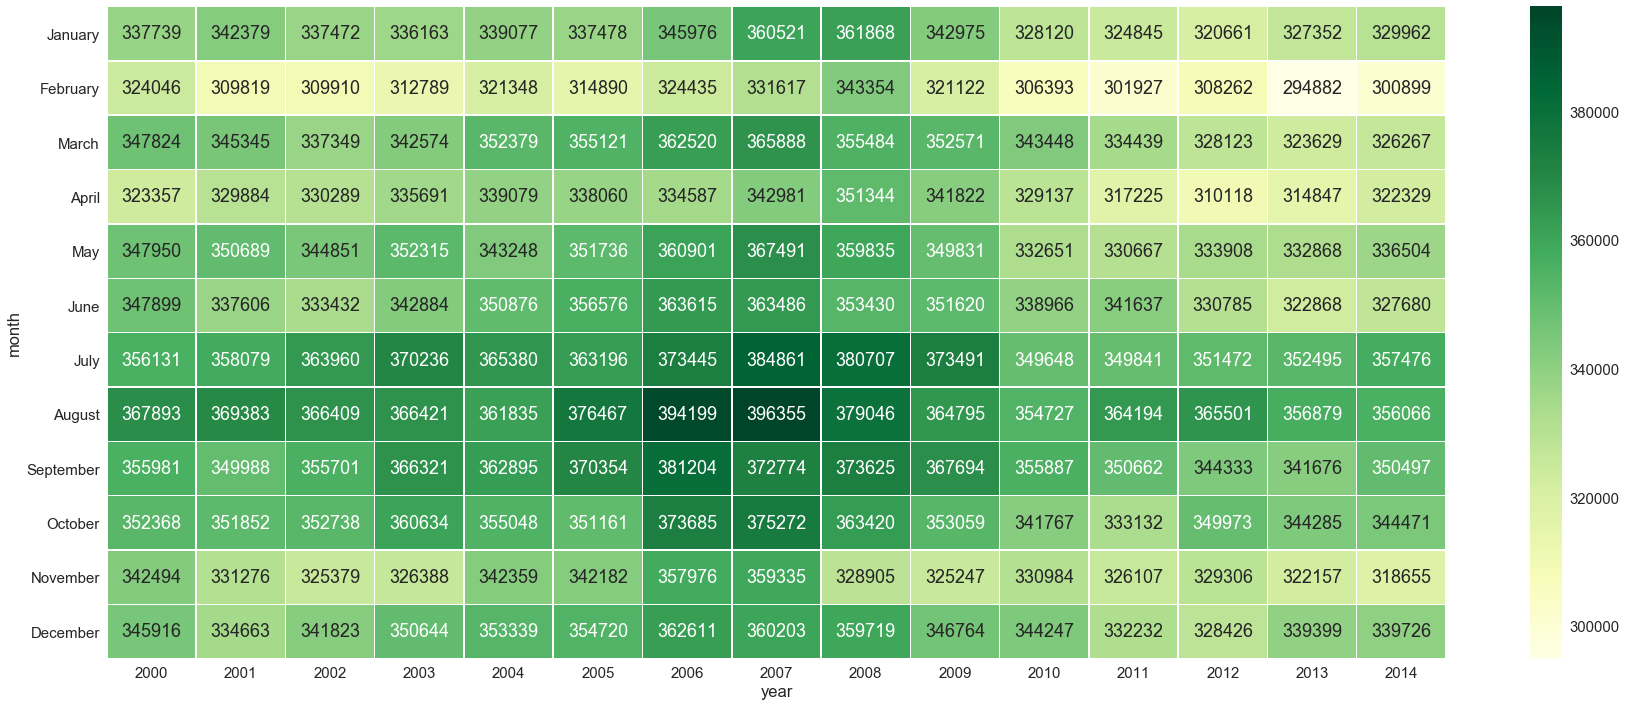

In [5]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(30, 12))
sns.heatmap(monthly_births, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGn");

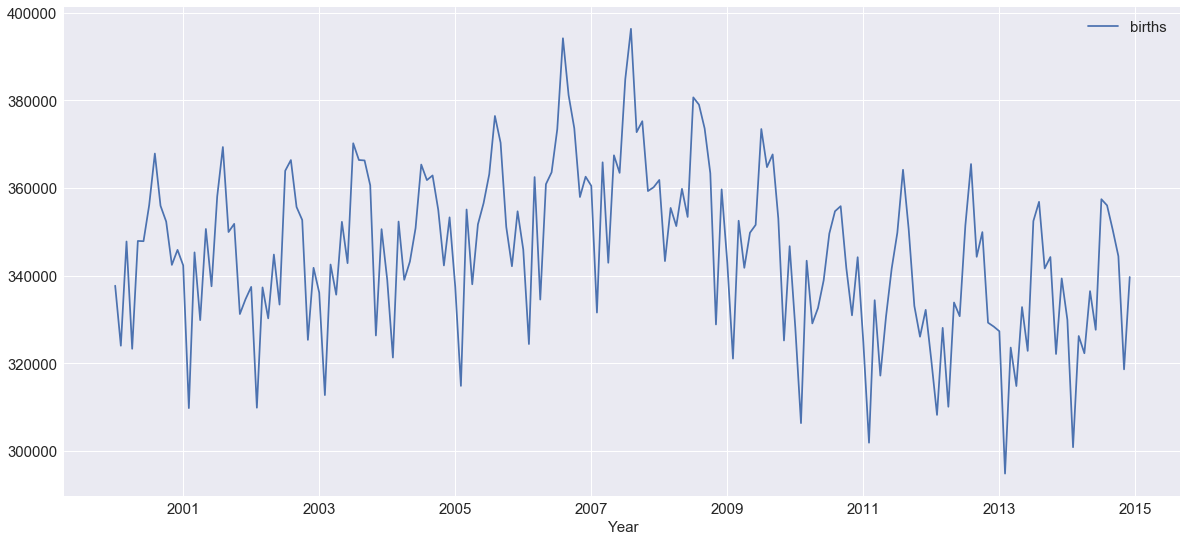

In [6]:
# trends and seasonal components are present
df_series.plot(figsize=(20,9), fontsize=15)
plt.xlabel('Year', fontsize=15);

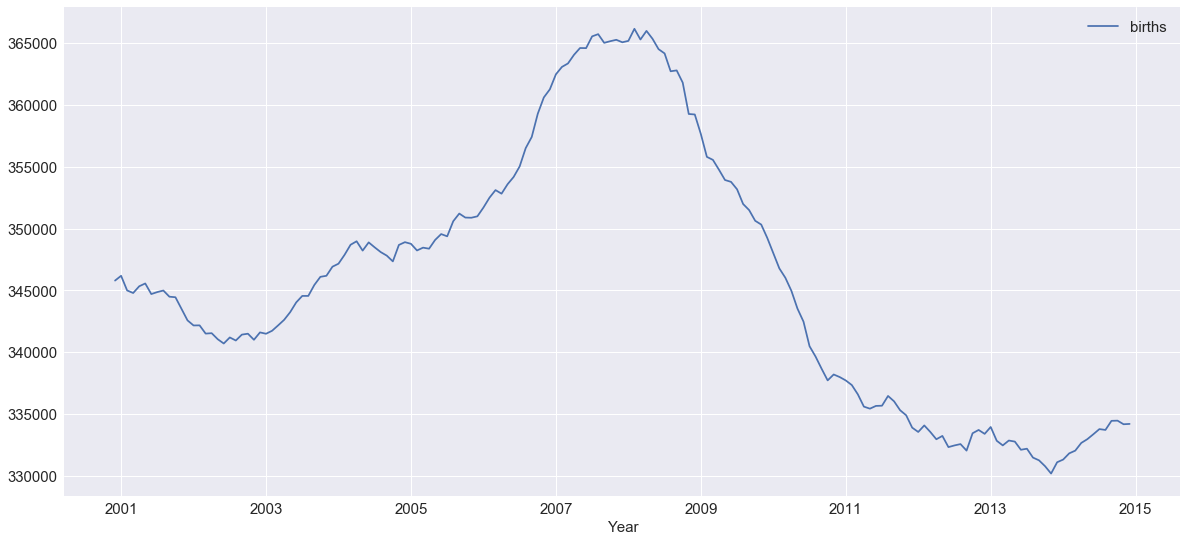

In [7]:
# identify trends by rolling average
df_series.rolling(12).mean().plot(figsize=(20,9), fontsize=15)
plt.xlabel('Year', fontsize=15);

#### peak seems to be in years 2007, 2008

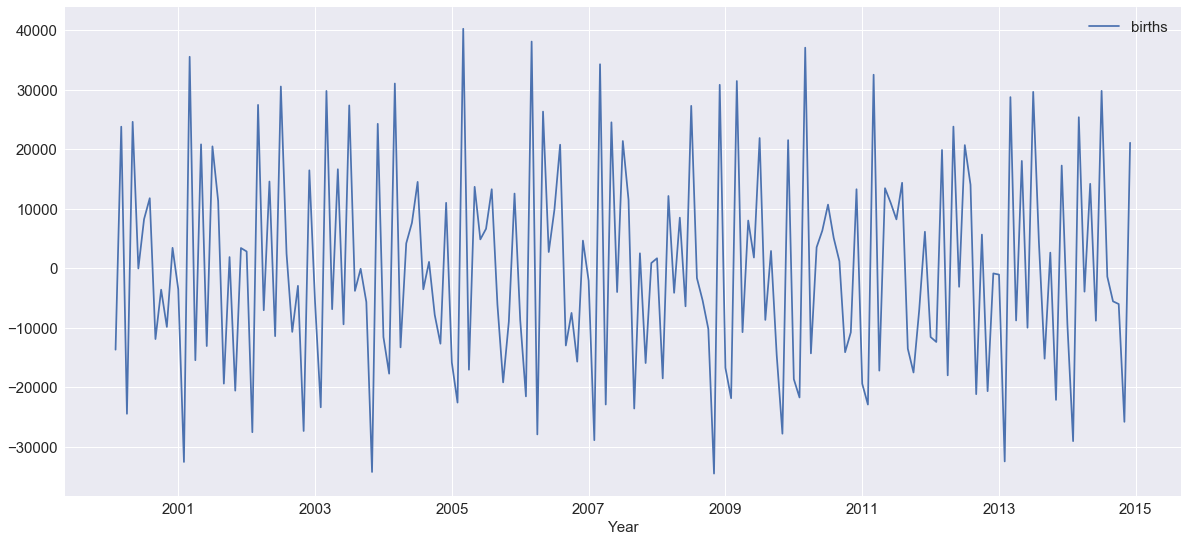

In [8]:
# identify seasonality by removing trends, first order differencing
df_series.diff().plot(figsize=(20,9), fontsize=15)
plt.xlabel('Year', fontsize=15);

In [9]:
#  TODO: explore further techniques